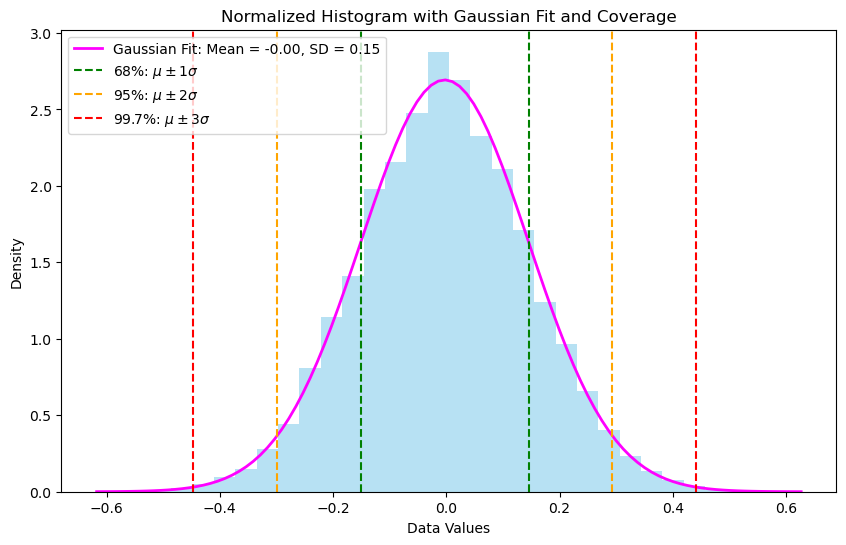

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate Sample Data
np.random.seed(0)
data = np.random.normal(loc=0.00, scale=0.15, size=10000)

# Plot a Normalized Histogram of the Data
plt.figure(figsize=(10, 6))
hist = plt.hist(data, bins=30, color='skyblue', alpha=0.6, density=True)

# Fit a Gaussian distribution to the data and calculate PDF
mean, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Plot the Gaussian fit
fig = plt.figure(figsize=(9, 6.5))
ax0 = fig.add_subplot(111)
ax0.plot(x, p, 'magenta', linewidth=2, label=f'Gaussian Fit: Mean = {mean:.2f}, SD = {std:.2f}')

# Adding vertical lines for 68%, 95%, 99.7% intervals
colors = ['green', 'orange', 'red']
labels = ['68%', '95%', '99.7%']
z_scores = [1, 2, 3]  # Corresponding z-scores for 68%, 95%, and 99.7%

for z, color, label in zip(z_scores, colors, labels):
    ax0.axvline(mean - z * std, color=color, linestyle='dashed', linewidth=1.5)
    ax0.axvline(mean + z * std, color=color, linestyle='dashed', linewidth=1.5, label=f'{label}: $\mu \pm {z}\sigma$')

# Customize plot
ax0.xlabel('Data Values')
ax0.ylabel('Density')
ax0.title('Normalized Histogram with Gaussian Fit and Coverage')
ax0.legend(loc='upper left')

fig.savefig('Beautiful Gaussian Distribution.png')


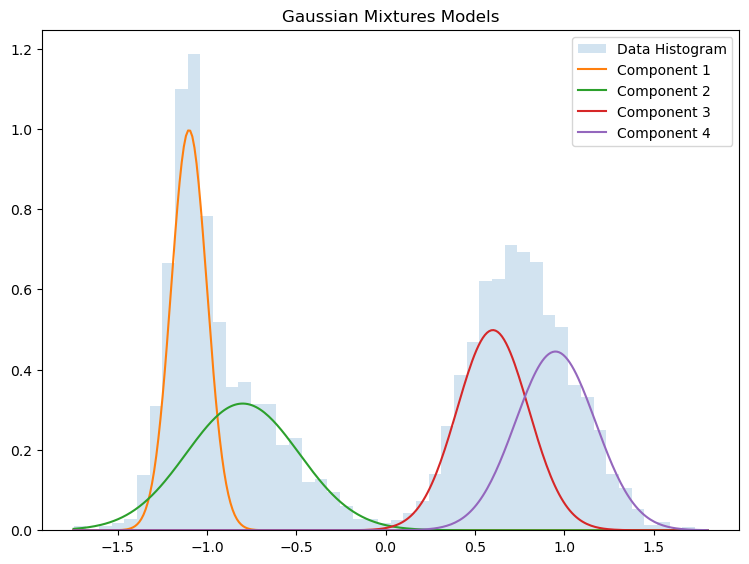

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_gaussian_samples(mu: list, sigma: list) -> np.ndarray:
    """Generate samples from multiple Gaussian distributions specified by means and standard deviations."""
    samples = np.zeros(1000*len(mu))
    np.random.seed(0)
    for i, (mean, std) in enumerate(zip(mu, sigma)):
        samples[i * 1000:(i + 1) * 1000] = np.random.normal(mean, std, 1000)
    return samples

def plot_gaussian_mixtures(data: np.ndarray, mu: np.ndarray, sigma: np.ndarray, pi: np.ndarray):
    """Plot the data and the estimated Gaussian models."""
    fig = plt.figure(figsize=(9, 6.5))
    ax0 = fig.add_subplot(111)
    x = np.linspace(min(data), max(data), num=300)
    ax0.hist(data, bins=50, alpha=0.2, density=True, label="Data Histogram")
    for i in range(len(pi)):
        y = pi[i] * norm(loc=mu[i], scale=sigma[i]).pdf(x)
        ax0.plot(x, y, label=f'Component {i+1}')  
    plt.title(f'Gaussian Mixtures Models')
    plt.legend()
    fig.savefig('Beautiful Gaussian Mixture Models.png')

# Generate Sample Data
np.random.seed(0)
mus = [-1.1, -0.8, 0.6, 0.95]
sigmas = [0.100, 0.316, 0.200, 0.224]
data = generate_gaussian_samples(mus, sigmas)
plot_gaussian_mixtures(data, mus, sigmas, [0.25, 0.25, 0.25, 0.25])

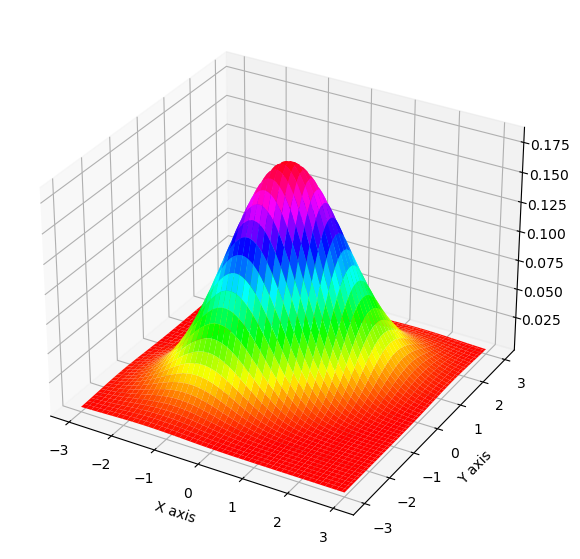

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Gaussian
mu = np.array([0, 0])  # Mean
sigma = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix

# Create a grid of (x, y) values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Create a frozen RV object
rv = multivariate_normal(mu, sigma)

# Compute the z values on the grid
Z = rv.pdf(pos)

# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='hsv', edgecolor='none')

# Add a color bar which maps values to colors.
# cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
# cbar.set_label('Probability Density')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
# ax.set_zlabel('Probability Density')
# ax.set_title('Gaussian Distribution')

fig.savefig('Beautiful 3D Gaussian Distribution.png')

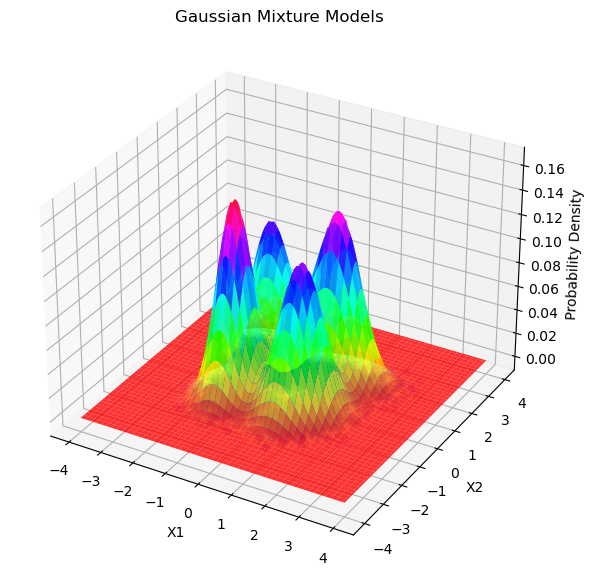

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

def generate_gaussian_samples(mu, cov):
    """Generate samples from multiple Gaussian distributions based on specified means and covariance matrices."""
    np.random.seed(1)
    samples = np.zeros((2000*len(mu), len(mu[0])))
    for i, (mean, covariance) in enumerate(zip(mu, cov)):
        samples[i*2000:(i+1)*2000] = np.random.multivariate_normal(mean, covariance, 2000)
    return samples

def plot_gaussian_mixtures(data, mu, cov, pi):
    """Visualize the data along with the Gaussian mixture model probability surfaces."""
    x, y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    pos = np.dstack((x, y))
    z = sum(pi[i] * multivariate_normal(mu[i], cov[i]).pdf(pos) for i in range(len(pi)))

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='hsv', linewidth=0, alpha=0.8)
    ax.scatter(data[:, 0], data[:, 1], np.zeros_like(data[:, 0]), color='b', alpha=0.1)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Probability Density')
    plt.title('Gaussian Mixture Models')
    fig.savefig('Beautiful 3D Gaussian Mixture Models.png')

mu = [[-1.0, -1.0], [-1.0, 0.9], [1.0, -1.0], [1.0, 1.0]]
cov = [[[0.2, 0.01], [0.01, 0.3]], [[0.4, -0.1], [-0.1, 0.3]], [[0.3, 0.08], [0.08, 0.35]], [[0.4, 0.03], [0.03, 0.2]]]
data = generate_gaussian_samples(mu, cov)
plot_gaussian_mixtures(data, mu, cov, [0.25, 0.25, 0.25, 0.25])

